In [1]:
#Sensitivity Plot Data Clicker
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
import pandas as pd
import seaborn
import matplotlib
from astropy.io import ascii
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d

font = {'family':'normal', 'weight':'normal', 'size':42}
plt.rc('font', **font)

In /software/rhel7/lib64/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /software/rhel7/lib64/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /software/rhel7/lib64/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /software/rhel7/lib64/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /software/rhel7/lib64/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [2]:
detec0, detec1, detec2, detec3, detec4 = ascii.read('detections_fake_KARPA2_set_0.csv'), ascii.read('detections_fake_KARPA2_set_1.csv'), ascii.read('detections_fake_KARPA2_set_2.csv'), ascii.read('detections_fake_KARPA2_set_3.csv'), ascii.read('detections_fake_KARPA2_set_4.csv')
detec5, detec6, detec7, detec8, detec9 = ascii.read('detections_fake_KARPA2_set_5.csv'), ascii.read('detections_fake_KARPA2_set_6.csv'), ascii.read('detections_fake_KARPA2_set_7.csv'), ascii.read('detections_fake_KARPA2_set_8.csv'), ascii.read('detections_fake_KARPA2_set_9.csv')

detec = [detec0, detec1, detec2, detec3, detec4, detec5, detec6, detec7, detec8, detec9]
detec_array = np.zeros((11, 100))

for k in range(len(detec)):
    for i in range(11):
        for j in range(10):
            name = 'col' + str(j+1)
            detec_array[i, k*10+j] = detec[k][name][i]

In [3]:
period_space = np.logspace(np.log10(3), np.log10(40), 100)
lin_period_space = np.linspace(3, 40, 10000)

new_detec = np.zeros((11, len(lin_period_space)))
for i in range(len(lin_period_space)):
    idx = np.argmin(abs(period_space - lin_period_space[i]))
    new_detec[:, i] = detec_array[:, idx]


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


1.2930726209037202


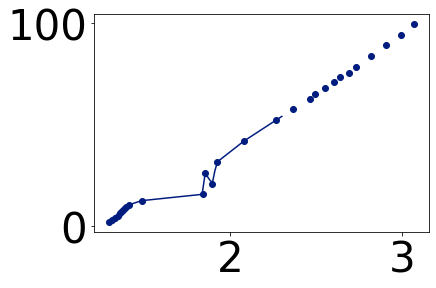

In [4]:
mass_y = np.array([0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.012, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.055, 0.06, 0.062, 0.065, 0.068, 0.07, 0.072, 0.075, 0.08, 0.085, 0.09, 0.095])
radius_y = [9.04, 9.17, 9.28, 9.38, 9.48, 9.55, 9.64, 9.72, 9.83, 10.36, 12.85, 13.24, 12.95, 13.42, 14.53, 15.86, 16.53, 17.21, 17.42, 17.83, 18.21, 18.45, 18.81, 19.12, 19.73, 20.33, 20.94, 21.46]
Radius_y = np.array([radius_y[i]/(6.9911) for i in range(len(radius_y))])
Mass_y = np.array([mass_y[i]*(1.989*10**30)/(1.898*10**27) for i in range(len(mass_y))])

m_r_relation = interp1d(Radius_y, Mass_y )
print(np.min(Radius_y))
radiusspace = np.linspace(1.4, 2.3, 61)
plt.plot(radiusspace, m_r_relation(radiusspace))
plt.scatter(Radius_y, Mass_y)
plt.show()

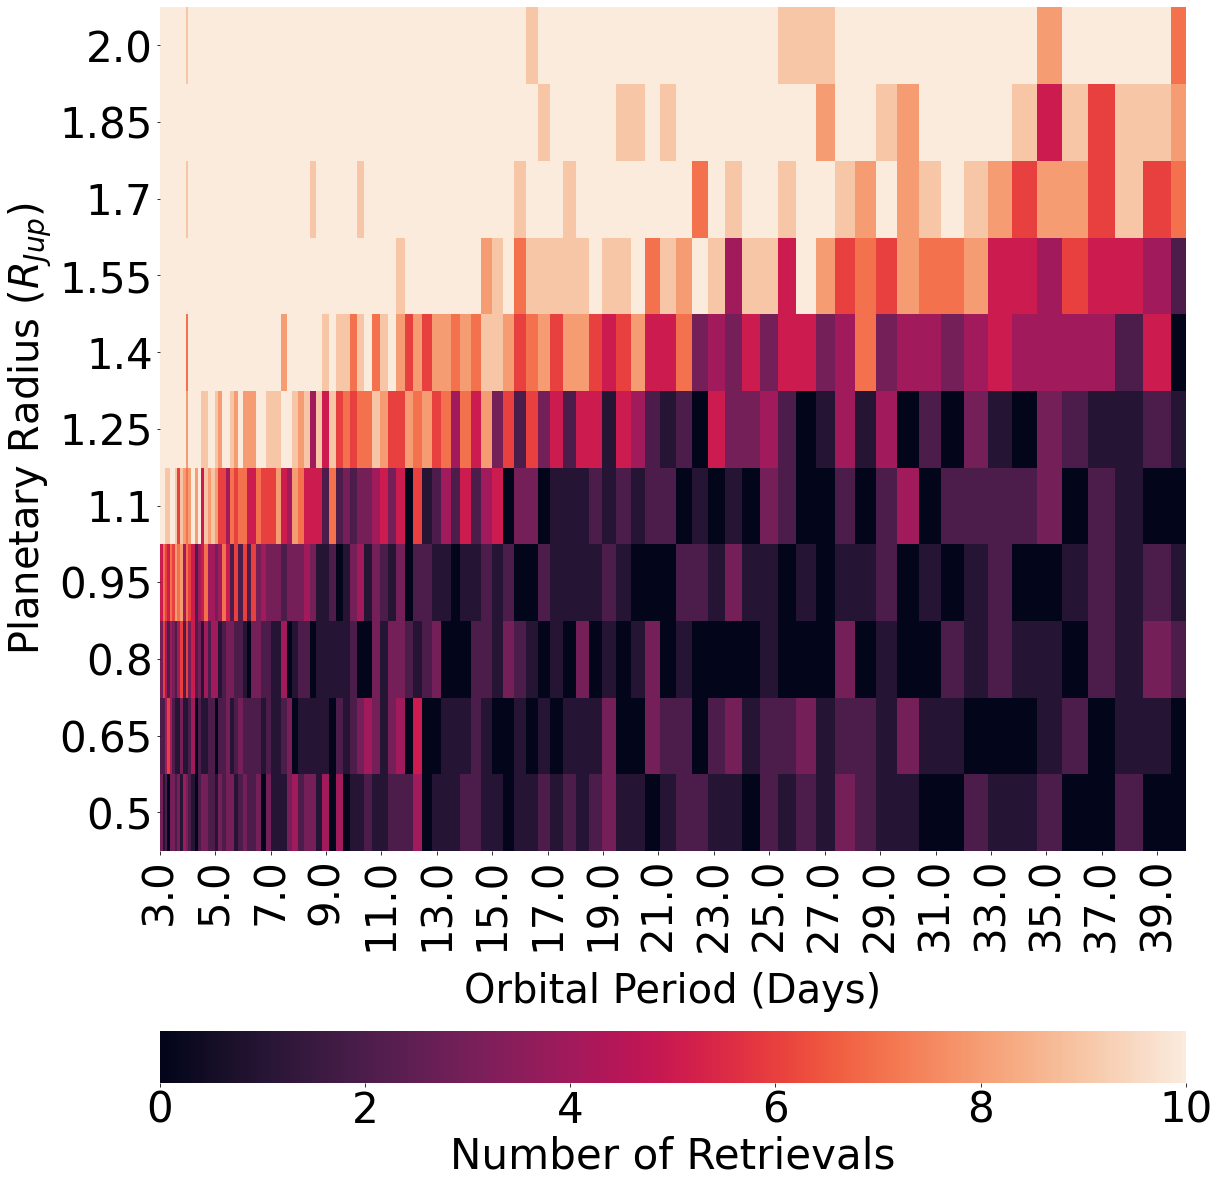

In [9]:
periods = []
for i in range(len(lin_period_space)):
    periods.append('{:.1f}'.format(lin_period_space[i]))
radii = [0.5, 0.65, 0.8, 0.95, 1.1, 1.25, 1.4, 1.55, 1.7, 1.85, 2]

alt_detec = pd.DataFrame(new_detec, index = radii, columns = periods)


ax_detec = seaborn.heatmap(alt_detec, cbar_kws = {'label': 'Number of Retrievals', 'orientation': 'horizontal'}, xticklabels = 540, yticklabels = 1)
plt.gca().invert_yaxis()
plt.ylabel('Planetary Radius ($R_{Jup}$)', fontsize=40)

#ax2 = ax_detec.twinx()
#ax2.set_yticks([1/22, 1/22+1/11, 1/22+2/11, 1/22+3/11, 1/22+4/11, 1/22+5/11, 1/22+6/11, 1/22+7/11, 1/22+8/11, 1/22+9/11, 1/22+10/11][-5:])
#ax2.set_yticklabels([str(m_r_relation(radiusspace)[i*10])[0:2] for i in range(5)])
#ax2.set_ylabel('Planetary Mass ($M_{Jup}$)')



plt.xlabel('Orbital Period (Days)', labelpad=20, fontsize=40, y=10)

fig = plt.gcf()
fig.set_size_inches(18, 18)
#fig.text(0.35, 0.24,'Orbital Period (Days)', fontsize=40)
plt.tight_layout()
plt.savefig('j1407_fake_results_w_mr_NR.png')
plt.show()

In [6]:
print(periods[5000])

21.5


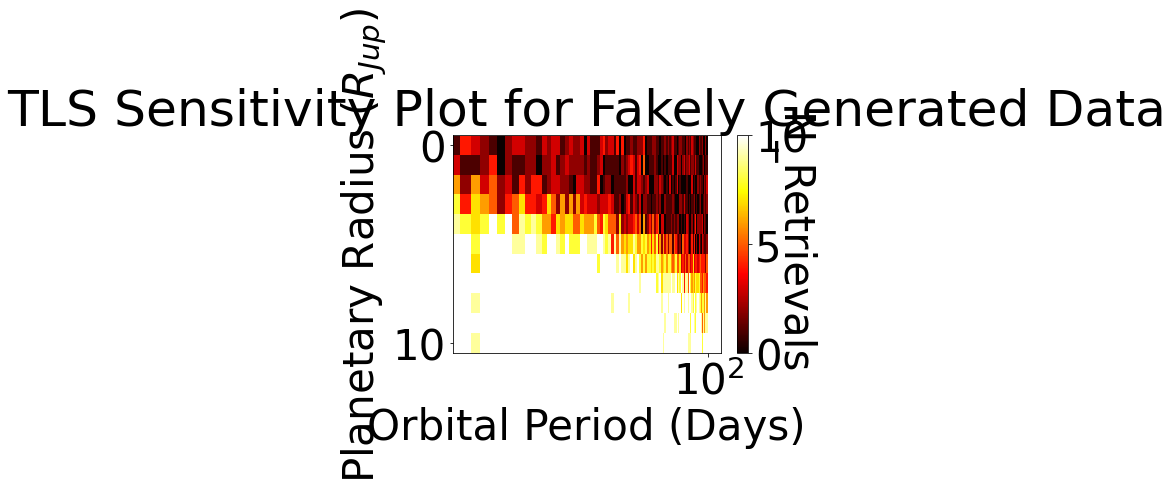

In [8]:
horizontal_min, horizontal_max = 3, 40
vertical_min, vertical_max = 0.8, 2.3

detec_array

plt.imshow(detec_array, cmap='hot', interpolation='nearest', aspect='auto')#, extent=[horizontal_min, horizontal_max, vertical_min, vertical_max])
plt.xlabel('Orbital Period (Days)')
plt.ylabel('Planetary Radius ($R_{Jup}$)')
plt.xscale('log')
plt.title('TLS Sensitivity Plot for Fakely Generated Data')
plt.colorbar().set_label('N_Retrievals', rotation=270)
#figure = plt.gcf()
#figure.set_size_inches(18, 10)
#plt.savefig('TLS_Sensitivity_Real')
plt.show()

In [ ]:
#That's all you need, below is an example if things don't work right away










In [ ]:
testdata, testdata1 = ascii.read('testfile.csv'), ascii.read('testfile1.csv')
datas = [testdata, testdata1]
sdes_test = np.zeros((10, 3))
print(datas[0])
for k in range(len(datas)):
    for i in range(5):
        for j in range(3):
            name = 'col' + str(j+1)
            sdes_test[k*5+i,j] = datas[k][name][i]
print(sdes_test)

In [ ]:
broken_sdes = [sdes5_0, sdes5_1, sdes6_0, sdes6_1, sdes7_0, sdes7_1, sdes8_0, sdes8_1, sdes9_0, sdes9_1]
broken_detecs = [detec5_0, detec5_1, detec6_0, detec6_1, detec7_0, detec7_1, detec8_0, detec8_1, detec9_0, detec9_1,]

broken_sde_array = np.zeros((10, 11, 100))
broken_detec_array = np.zeros((10, 11, 100))


for k in range(len(brokens)):
    for i in range(11):
        for j in range(10):
            name = 'col' + str(j+1)
            broken_sde_array[k][i, j] = broken_sdes[k][name][10-i]
            broken_detec_array[k][i, j] = broken_detecs[k][name][10-i]


sdes5, sdes6, sdes7, sdes8, sdes9 = np.zeros((11, 10)), np.zeros((11, 10)), np.zeros((11, 10)), np.zeros((11, 10)), np.zeros((11, 10))
detec5, detec6, detec7, detec8, detec9 = np.zeros((11, 10)), np.zeros((11, 10)), np.zeros((11, 10)), np.zeros((11, 10)), np.zeros((11, 10))

getal5, getal6, getal7, getal8, getal9 = 

sdes5[:, 0:getal5], detec5[:, 0:getal5] = broken_sde_array[0][:, 0:getal5], broken_detec_array[0][:, 0:getal5]
sdes6[:, 0:getal6], detec6[:, 0:getal6] = broken_sde_array[2][:, 0:getal6], broken_detec_array[2][:, 0:getal6]
sdes7[:, 0:getal7], detec6[:, 0:getal7] = broken_sde_array[4][:, 0:getal7], broken_detec_array[4][:, 0:getal7]
sdes8[:, 0:getal8], detec6[:, 0:getal8] = broken_sde_array[6][:, 0:getal8], broken_detec_array[6][:, 0:getal8]
sdes9[:, 0:getal9], detec6[:, 0:getal9] = broken_sde_array[8][:, 0:getal9], broken_detec_array[8][:, 0:getal9]

sdes5[:, getal5:], detec5[:, getal5:] = broken_sde_array[1][:, getal5:], broken_detec_array[1][:, getal5:]
sdes6[:, getal6:], detec6[:, getal6:] = broken_sde_array[3][:, getal6:], broken_detec_array[3][:, getal6:]
sdes7[:, getal7:], detec6[:, getal7:] = broken_sde_array[5][:, getal7:], broken_detec_array[5][:, getal7:]
sdes8[:, getal8:], detec6[:, getal8:] = broken_sde_array[7][:, getal8:], broken_detec_array[7][:, getal8:]
sdes9[:, getal9:], detec6[:, getal9:] = broken_sde_array[9][:, getal9:], broken_detec_array[9][:, getal9:]